In [1]:
import numpy as np
import pandas as pd
import re  # used to search words in text or paragraphs
from nltk.corpus import stopwords # to remove meaningless words such as a, the ,are.....
from nltk.stem.porter import PorterStemmer # filters the root word
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
Dataset = pd.read_csv("/content/Gaza + News.csv")

In [5]:
Dataset.nunique()

text     48462
label        2
dtype: int64

In [7]:
Dataset

,text,label
0,abortion says annies list political group supp...,0
1,energy history job accomplishments decline coa...,1
2,foreign policy hillary clinton agrees john mcc...,1
3,education chicago bears starting quarterbacks ...,1
4,ethics m person stage worked actively just las...,1
...,...,...
54112,Israeli airstrike that killed dozens in Rafah ...,1
54113,"Deal reached to extend Israel-Hamas truce, Isr...",1
54114,US wants Israel to move civilians out of south...,1
54115,Israeli leaders ratchet up war rhetoric as tru...,1


In [8]:
# Reset the index (optional)
Dataset.reset_index(drop=True, inplace=True)

In [9]:
Dataset.isnull().sum()

text     1
label    0
dtype: int64

In [10]:
# Assuming your DataFrame is named df
Dataset = Dataset.dropna()

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)

#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on tweet column
Dataset['text']=Dataset['text'].apply(cleaning)

<ipython-input-12-4167ca2d2835>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-12-4167ca2d2835>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['text']=Dataset['text'].apply(cleaning)


In [13]:
# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'http\S+')
    return url_pattern.sub(r'', text)

# Apply the function to the 'text' column
Dataset['text'] = Dataset['text'].apply(remove_urls)

<ipython-input-13-494c4b4479b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['text'] = Dataset['text'].apply(remove_urls)


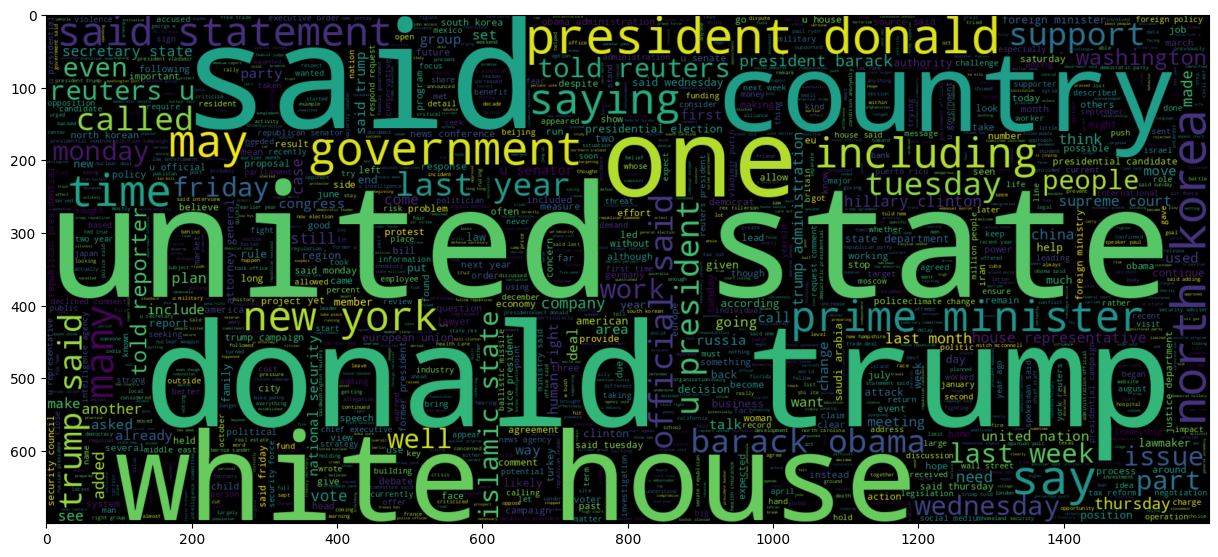

In [14]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset[Dataset.label== 1].text))
plt.imshow(wc, interpolation="bilinear")

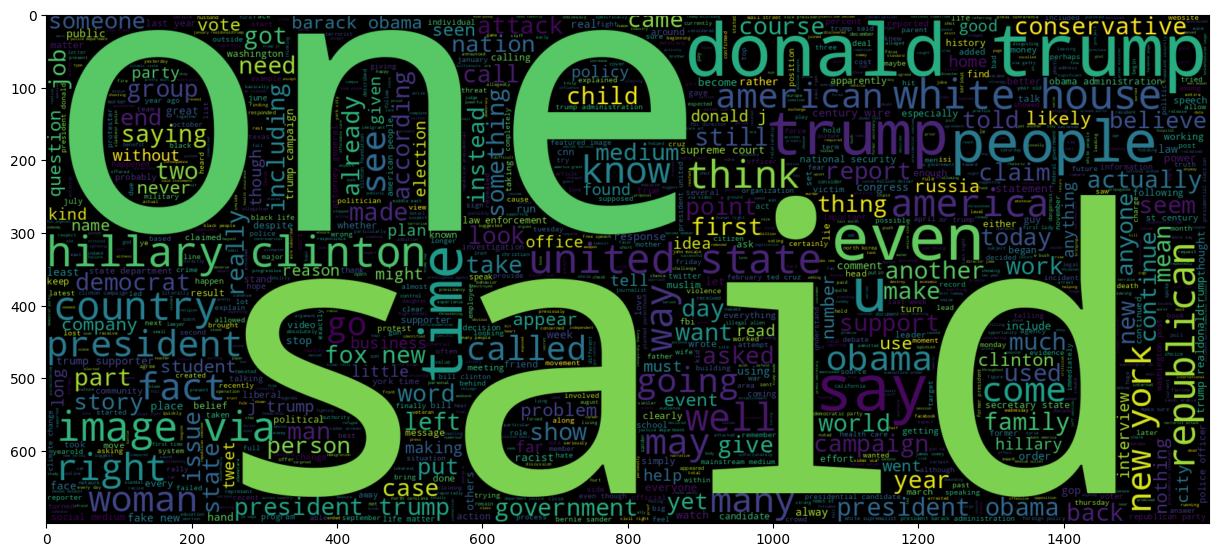

In [15]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset[Dataset.label== 0].text))
plt.imshow(wc, interpolation="bilinear")

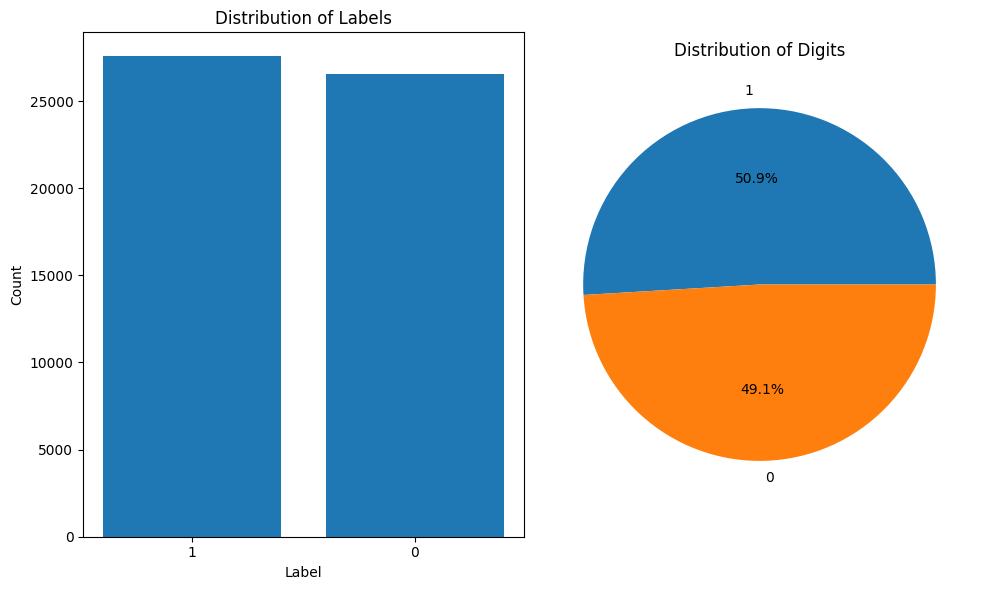

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'label' column
label_counts = Dataset['label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].bar(label_counts.index.astype(str), label_counts.values)
axes[0].set_title('Distribution of Labels')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Digits')

plt.tight_layout()
plt.show()

In [17]:
Dataset

,text,label
0,abortion say annies list political group suppo...,0
1,energy history job accomplishment decline coal...,1
2,foreign policy hillary clinton agrees john mcc...,1
3,education chicago bear starting quarterback la...,1
4,ethic person stage worked actively last year p...,1
...,...,...
54112,israeli airstrike killed dozen rafah carried u...,1
54113,deal reached extend israel hamas truce israeli...,1
54114,u want israel move civilian southern gaza isra...,1
54115,israeli leader ratchet war rhetoric truce expi...,1


In [18]:
Dataset.to_csv(r"Gaza_News_preprocessing.csv",index=False)